<a href="https://colab.research.google.com/github/omarahmed93/graduation-project/blob/main/projectgraduationpart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import imutils
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
model= load_model('/content/drive/MyDrive/model (1)')

In [4]:
model

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 dropout (Dropout)           (None, 3, 3, 128)         0

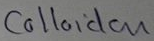

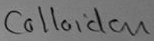

In [6]:
img = cv2.imread('/content/0000553.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
cv2_imshow(gray)

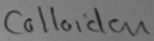

In [7]:
blur = cv2.GaussianBlur(gray, (3,3), 0)
cv2_imshow(blur)

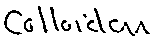

In [8]:
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adaptive)

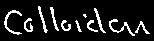

In [9]:
invertion = 255 - adaptive
cv2_imshow(invertion)

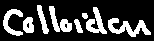

In [10]:
dilation = cv2.dilate(invertion, np.ones((3,3)))
cv2_imshow(dilation)

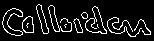

In [11]:
edges = cv2.Canny(dilation, 40, 150)
cv2_imshow(edges)

In [12]:
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method = 'left-to-right')[0]
  return conts

In [13]:
conts = find_contours(dilation.copy())

In [14]:
conts

(array([[[11,  9]],
 
        [[10, 10]],
 
        [[ 9, 10]],
 
        [[ 8, 11]],
 
        [[ 7, 11]],
 
        [[ 7, 12]],
 
        [[ 5, 14]],
 
        [[ 5, 15]],
 
        [[ 4, 16]],
 
        [[ 4, 19]],
 
        [[ 3, 20]],
 
        [[ 3, 25]],
 
        [[ 4, 26]],
 
        [[ 4, 28]],
 
        [[ 8, 32]],
 
        [[ 9, 32]],
 
        [[10, 33]],
 
        [[11, 33]],
 
        [[12, 34]],
 
        [[15, 34]],
 
        [[16, 35]],
 
        [[19, 35]],
 
        [[20, 34]],
 
        [[22, 34]],
 
        [[22, 32]],
 
        [[21, 32]],
 
        [[20, 31]],
 
        [[15, 31]],
 
        [[14, 30]],
 
        [[13, 30]],
 
        [[12, 29]],
 
        [[11, 29]],
 
        [[ 7, 25]],
 
        [[ 7, 20]],
 
        [[ 8, 19]],
 
        [[ 8, 18]],
 
        [[ 9, 17]],
 
        [[ 9, 16]],
 
        [[12, 13]],
 
        [[15, 13]],
 
        [[16, 14]],
 
        [[17, 14]],
 
        [[19, 16]],
 
        [[22, 16]],
 
        [[22, 13]],
 
        [[

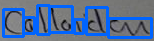

In [15]:
min_w, max_w = 4, 160
min_h, max_h = 14, 140
img_copy = img.copy()
for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  #print(x, y, w, h)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    roi = gray[y:y+h, x:x+w]
    #cv2_imshow(roi)
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh)
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 100, 0), 2)
cv2_imshow(img_copy)

In [16]:
def extract_roi(img):
  roi = img[y:y + h, x:x + w]
  return roi

In [17]:
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  return thresh

In [18]:
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width = 28)
  else:
    resized = imutils.resize(img, height = 28)

  (h, w) = resized.shape
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value = (0,0,0))
  filled = cv2.resize(filled, (28,28))
  return filled

In [19]:
(x, y, w, h) = cv2.boundingRect(conts[1])
print(x, y, w, h)
test_img = thresholding(gray[y:y+h, x:x+w])
cv2_imshow(test_img)
(h, w) = test_img.shape
print(h, w)
test_img2 = resize_img(test_img, w, h)
cv2_imshow(test_img2)
print(test_img2.shape)

23 17 11 16


16 11


(28, 28)


In [20]:
cv2_imshow(cv2.resize(test_img, (28,28)))

In [21]:
def normalization(img):
  img = img.astype('float32') / 255.0
  img = np.expand_dims(img, axis = -1)
  return img

In [22]:
test_img2.shape, normalization(test_img2).shape

((28, 28), (28, 28, 1))

In [23]:
characters = []

In [24]:
def process_box(gray, x, y, w, h):
  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)
  cv2_imshow(resized)
  normalized = normalization(resized)
  characters.append((normalized, (x, y, w, h)))

In [25]:
for c in conts:
  #print(c)
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    process_box(gray, x, y, w, h)

In [26]:
characters[0]

(array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.9647059 ],
         [0.        ],
        

In [27]:
boxes = [box[1] for box in characters]
boxes

[(3, 9, 20, 27),
 (23, 17, 11, 16),
 (37, 5, 12, 29),
 (49, 6, 23, 26),
 (74, 19, 9, 14),
 (86, 7, 21, 27),
 (108, 18, 43, 19)]

In [28]:
pixels = np.array([pixel[0] for pixel in characters], dtype = 'float32')

In [29]:
pixels

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [30]:
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
characters_list=letters
characters_list = [l for l in characters_list]

In [31]:
print(characters_list)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [32]:
pixels[0].shape

(28, 28, 1)

In [33]:
pixels.shape

(7, 28, 28, 1)

In [34]:
predictions = model.predict(pixels)

In [35]:
predictions

array([[7.71929482e-12, 1.79219528e-09, 9.99492168e-01, 5.76950843e-09,
        8.74263969e-06, 2.61092136e-05, 2.64905484e-05, 2.93634041e-13,
        3.31630218e-07, 2.70076894e-09, 1.00497164e-06, 2.40667840e-04,
        3.05697064e-13, 1.55510360e-09, 1.43090838e-05, 3.72447282e-08,
        1.11399723e-09, 3.37347700e-07, 1.89390819e-04, 4.77060439e-07,
        2.00811048e-08, 1.16963531e-11, 6.61439490e-13, 3.82855813e-12,
        1.28909838e-09, 7.60767560e-10],
       [2.45610681e-06, 3.36041045e-03, 9.46900909e-05, 4.98335908e-07,
        1.67537626e-04, 4.58964166e-07, 9.75644171e-01, 1.04615383e-09,
        2.89386115e-09, 1.71310163e-07, 3.04667128e-06, 1.28765549e-07,
        4.02170346e-11, 8.46055048e-09, 1.28830655e-03, 8.32746821e-07,
        1.83905680e-02, 5.23099652e-06, 1.04150455e-03, 1.09498934e-08,
        2.85217272e-08, 1.29209514e-14, 1.49855750e-09, 9.12463681e-12,
        5.39794343e-09, 1.10309761e-08],
       [1.48542909e-04, 1.45199351e-06, 1.97439408e-03

In [36]:
predictions.shape

(7, 26)

In [37]:
boxes

[(3, 9, 20, 27),
 (23, 17, 11, 16),
 (37, 5, 12, 29),
 (49, 6, 23, 26),
 (74, 19, 9, 14),
 (86, 7, 21, 27),
 (108, 18, 43, 19)]

C  ->  99.94921684265137


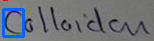

G  ->  97.56441712379456


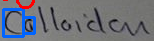

L  ->  81.6466212272644


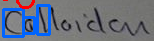

L  ->  49.816349148750305


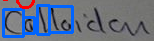

X  ->  43.310800194740295


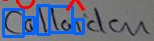

J  ->  99.02847409248352


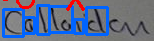

W  ->  92.7212655544281


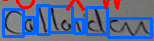

In [38]:
img_copy = img.copy()
for (prediction, (x, y, w, h)) in zip(predictions, boxes):
  i = np.argmax(prediction)
  #print(i)
  probability = prediction[i]
  #print(probability)
  character = characters_list[i]
  #print(character)

  cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_copy, character, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(character, ' -> ', probability * 100)

  cv2_imshow(img_copy)

In [39]:
def extract_roi(img, margin=2):
  roi = img[y - margin:y + h, x - margin:x + w + margin]
  return roi

In [40]:
conts = find_contours(dilation.copy())
characters = []
for c in conts:
  (x, y, w, h) = cv2.boundingRect(c)
  if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    process_box(gray, x, y, w, h)

In [41]:
boxes = [b[1] for b in characters]
pixels = np.array([p[0] for p in characters], dtype='float32')
predictions = model.predict(pixels)

C  ->  99.96103644371033


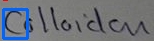

G  ->  88.00539374351501


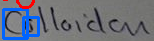

L  ->  81.85683488845825


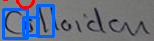

L  ->  92.35275983810425


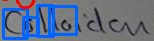

L  ->  77.43433117866516


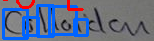

J  ->  99.094158411026


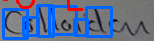

W  ->  96.77428603172302


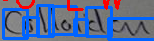

In [42]:
img_copy = img.copy()
for (prediction, (x, y, w, h)) in zip(predictions, boxes):
  i = np.argmax(prediction)
  probability = prediction[i]
  character = characters_list[i]
  
  cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255,100,0), 2)
  cv2.putText(img_copy, character, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255), 2)
  print(character, ' -> ', probability * 100)

  cv2_imshow(img_copy)